In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

In [2]:
from useful_functions import filter_papers, paper_search, get_n_papers, faculty_stats, evo_plot, faculty

## Run the search for papers and quickly look at the stats. 

In [3]:
#Query ADS
ql = dict()
years = np.arange(2013, 2024)
for year in years:
    ql[year] = filter_papers(paper_search(year))

In [4]:
#Calculate a linear correction for the final year. See end of notebook.
time_now = Time.now()
weights = np.ones(years.shape)
for i, year in enumerate(years):
    time_start_year = Time("{}-01-01 00:00:00".format(year))
    time_end_year = Time("{}-12-31 23:59:59".format(year))
    if time_now<time_end_year:
        weights[i] = (time_now-time_start_year).value/(time_end_year-time_start_year).value
print(weights)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.54755191]


In [16]:
#print the total number of papers. 
for i, year in enumerate(years):
    print("{}: {}".format(year, len(ql[year])))

2013: 6
2014: 18
2015: 59
2016: 72
2017: 111
2018: 111
2019: 118
2020: 126
2021: 118
2022: 128
2023: 87


In [18]:
#Print all authors that have used the UDP affiliation.
all_names = list()
for year in years:
    for paper in ql[year]:
        all_names.extend(paper.udp_authors)
np.unique(all_names)

array(['Aguilera Gomez, C', 'Aravena, M', 'Assef, R', 'Batalla Falcon, G',
       'Bertrang, G', 'Bhowmik, T', 'Brisbin, D', 'Brito Silva, D',
       'Chavan, P', 'Cieza, L', 'De Brito Silva, D', 'Diaz Santos, T',
       'Gonzalez Lopez, J', 'Gonzalez Ruilova, C', 'Guaita, L',
       'Gupta, K', 'Hueichapan, E', 'Infante, L', 'Jegatheesan, K',
       'Jenkins, J', 'Jiang, C', 'Jofre, P', 'Johnston, E', 'Kawamuro, T',
       'Lambert, T', 'Liao, M', 'Madler, T', 'Maia, M', 'Mazzucchelli, C',
       'Muzic, K', 'Nogueira, P', 'Pena Rojas, P', 'Pena, P', 'Pessi, T',
       'Posses, A', 'Prieto, J', 'Principe, D', 'Ramirez, R', 'Ricci, C',
       'Rojas, A', 'Romero Canizales, C', 'Rouan, D', 'Ruiz Rodriguez, D',
       'Samadi Ghadim, A', 'Schmidt, T', 'Solimano, M', 'Temple, M',
       'Tortosa, A', 'Tucci Maia, M', 'Vitali, S', 'Yang, B', 'Zewdie, D',
       'Zurlo, A', 'de Brito Silva, D'], dtype='<U19')

### Evolution of publications per faculty when counted as is done for incentivos

In other words, we are dividing by the total number of UDP authors (an approximation to how this is actually done) and removing papers where the first author is a student.

In [17]:
#Divide papers as they go for incentivos.
n_papers1 = dict()
for year in years:
    n_papers1[year] = get_n_papers(ql[year])
median_papers1, av_papers1 = faculty_stats(n_papers1, years)

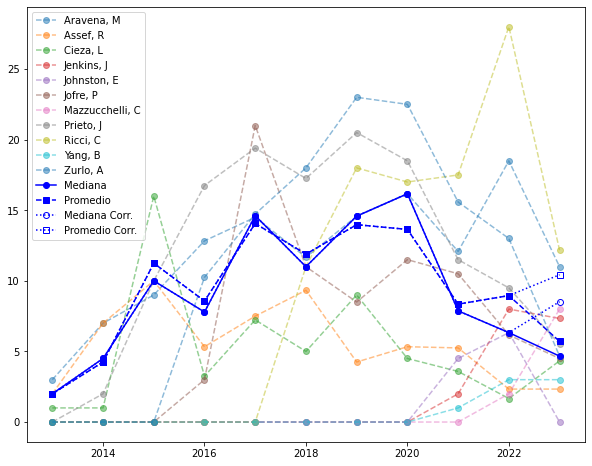

In [7]:
evo_plot(n_papers1, median_papers1, av_papers1, years, weights)

### Evolution of total publications per faculty

Here we only divide publications between multiple faculty authors, but do not count anyone else. 

In [8]:
#Sort dividing papers only considering faculty.
n_papers2 = dict()
for year in years:
    n_papers2[year] = get_n_papers(ql[year], only_faculty=True)
median_papers2, av_papers2 = faculty_stats(n_papers2, years)

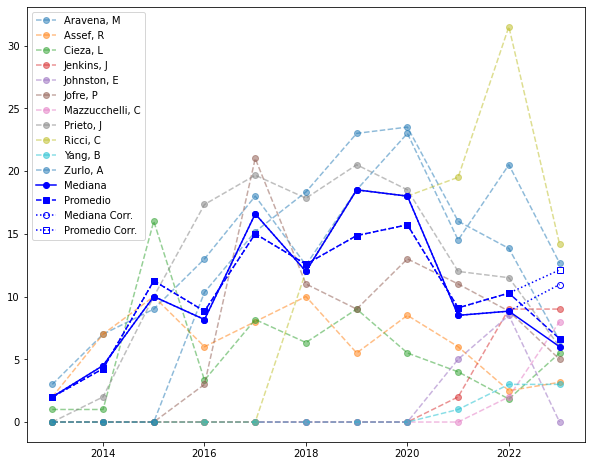

In [9]:
#Plot the evolution of all faculty papers. 
evo_plot(n_papers2, median_papers2, av_papers2, years, weights)

### Mean Trends Comparison

Compare the evolution of the median and average papers per faculty. Also compute the average number of papers faculty are responsible for. The idea here is that if postdocs publish papers without the faculty, the faculty are still indirectly responsible for that publication by bringing the postdoc. 

In [10]:
#Calculate the average number of papers a faculty member is responsible for. 
av_papers3 = np.zeros(years.shape)
nf = np.zeros(years.shape)
ntp = np.zeros(years.shape)
for i,year in enumerate(years):
    #Find how many faculty there were at UDP.
    for name in faculty:
        if name in n_papers1[year]:
            nf[i] += 1
    #In 2023, it has to be equal to the number of faculty, but it is possible a faculty has not published yet.
    if year==years[-1]:
        nf[i] = len(faculty)
    #Now, find the total number of astro papers for that year. 
    ntp[i] = np.sum(list(n_papers1[year].values()))
    #Now, get the average paper per faculty.
    av_papers3[i] = ntp[i]/nf[i]

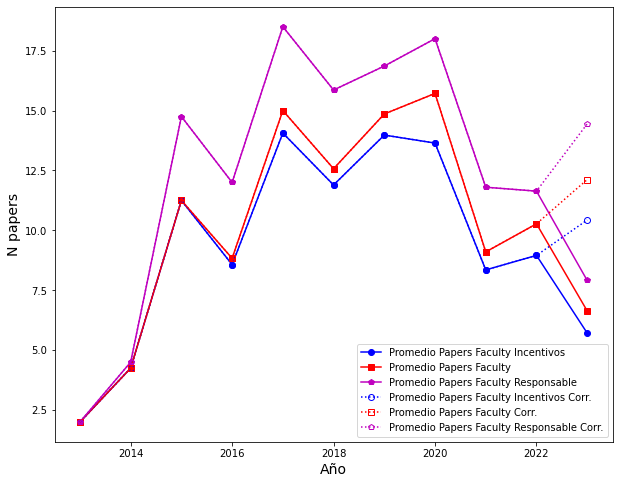

In [12]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.plot(years, av_papers1, '-bo', label="Promedio Papers Faculty Incentivos")
ax.plot(years, av_papers2, '-rs', label="Promedio Papers Faculty")
ax.plot(years, av_papers3, '-mp', label="Promedio Papers Faculty Responsable")
ax.plot(years, av_papers1/weights, 'bo', label="Promedio Papers Faculty Incentivos Corr.", fillstyle='none', linestyle='dotted')
ax.plot(years, av_papers2/weights, 'rs', label="Promedio Papers Faculty Corr.", fillstyle='none', linestyle='dotted')
ax.plot(years, av_papers3/weights, 'mp', label="Promedio Papers Faculty Responsable Corr.", fillstyle='none', linestyle='dotted')
ax.set_xlabel("Año", fontsize=14)
ax.set_ylabel("N papers", fontsize=14)
ax.legend()
plt.show()

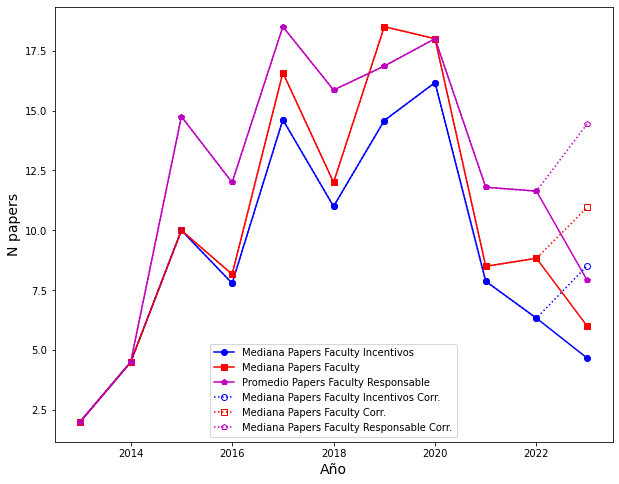

In [13]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.plot(years, median_papers1, '-bo', label="Mediana Papers Faculty Incentivos")
ax.plot(years, median_papers2, '-rs', label="Mediana Papers Faculty")
ax.plot(years, av_papers3, '-mp', label="Promedio Papers Faculty Responsable")
ax.plot(years, median_papers1/weights, 'bo', label="Mediana Papers Faculty Incentivos Corr.", fillstyle='none', linestyle='dotted')
ax.plot(years, median_papers2/weights, 'rs', label="Mediana Papers Faculty Corr.", fillstyle='none', linestyle='dotted')
ax.plot(years, av_papers3/weights, 'mp', label="Mediana Papers Faculty Responsable Corr.", fillstyle='none', linestyle='dotted')
ax.set_xlabel("Año", fontsize=14)
ax.set_ylabel("N papers", fontsize=14)
ax.legend()
plt.show()

### Calculate papers per semester

In [14]:
#For each year find the ratio of papers between the first and second halve of the year.
n_paper_first_semester = np.zeros(len(years[1:-1]))
for i, year in enumerate(years[1:-1]):
    month = list()
    for paper in ql[year]:
        month.append(float(paper.pubdate.split("-")[1]))
    month = np.array(month)
    n_paper_first_semester[i] = len(month[month<=6])/len(month)

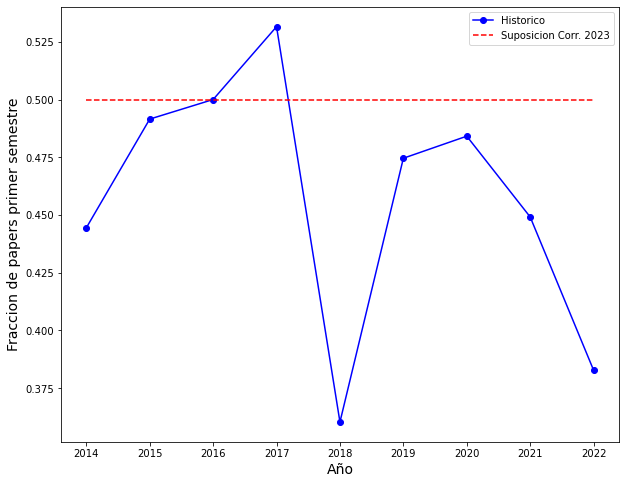

In [15]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.plot(years[1:-1], n_paper_first_semester, "-bo", label='Historico')
ax.plot(years[1:-1], 0.5*np.ones(years[1:-1].shape), '--r', label='Suposicion Corr. 2023')
ax.set_ylabel("Fraccion de papers primer semestre", fontsize=14)
ax.set_xlabel("Año", fontsize=14)
ax.legend()
plt.show()